## Problem 1 - Basic EDA with pandas and matplotlib

Back in HW2, we used R's dplyr package to analyze data from Washington DC's bike share system. Now, you'll 
be able to see what doing a similar analysis using Python is like.
For this assignment, we'll
be using data from one of the Kaggle Datasets called the Cycle Share
Dataset. Go to [https://www.kaggle.com/pronto/cycle-share-dataset](https://www.kaggle.com/pronto/cycle-share-dataset)
to read about the data. We will be using the `trip.csv` and the
`station.csv` files. I have made them available to you as part of the
assignment. Make sure you use the versions I gave you as I've done a few modifications to make things easier.

In this first problem, you are taking on the role of an analyst
who is doing some exploration of this raw trip data.

### Step 1 - get ready to analyze trip.csv file

If you're reading this, you've downloaded **hw4_files_w24.zip** and extracted it.

Rename this Jupyter notebook as` hw4_cycleshare_[your last name].ipynb`. Mine would be called `hw4_cycleshare_isken.ipynb`. 

Browse the files to get sense of structure using a text editor or the shell.

Visit the Kaggle site listed above for more about the file contents. You
will mostly be using the `trip.csv` data file but I've included the 
`station.csv` file as we'll need it too.

### Step 2 - Read data and explore rows

Now you'll need to complete the following tasks in Python. Just like we did in class, you should
use a combination of markdown text (be concise, no need to write tons of text) to explain 
what you are doing and Python code cells to actually do it.

First let's load the libraries we'll need. Ignore warnings about the version of numpy.

In [142]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
%matplotlib inline

In [144]:
# Create variables to store filenames to read.
file_trip_data = './data/trip.csv'
file_station_data = './data/station.csv'

**QUESTION 1.1** Read in the data files and check structure. Make sure that `starttime` and `stoptime` get read in as datetimes.

In [145]:
# Read the trip data
trip_df = pd.read_csv(file_trip_data, parse_dates=["starttime", "stoptime"])

# Read the station data
station_df = pd.read_csv(file_station_data)

In [146]:
trip_df.head(1)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0


In [147]:
# Check out the structure of the resulting DataFrames
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286857 non-null  int64         
 1   starttime          286857 non-null  datetime64[ns]
 2   stoptime           286857 non-null  datetime64[ns]
 3   bikeid             286857 non-null  object        
 4   tripduration       286857 non-null  float64       
 5   from_station_name  286857 non-null  object        
 6   to_station_name    286857 non-null  object        
 7   from_station_id    286857 non-null  object        
 8   to_station_id      286857 non-null  object        
 9   usertype           286857 non-null  object        
 10  gender             181557 non-null  object        
 11  birthyear          181553 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 26.3+ MB


In [148]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


**QUESTION 1.2** In two separate code cells, do the following:

- List the first fifteen rows (all the columns), 
- list rows with **index values** 500 through 510 (inclusive) but only the `starttime`, `stoptime`, `from_station_id`, and `to_station_id` columns.

In [149]:
# First 15 rows
trip_df.iloc[:15, :]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,436,2014-10-13 10:34:00,2014-10-13 10:47:00,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,437,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,438,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
8,439,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974.0
9,440,2014-10-13 11:35:00,2014-10-13 11:45:00,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0


In [150]:
# Rows 500-510 with select columns
trip_df.iloc[500:511, [1, 2, 7, 8]]

,starttime,stoptime,from_station_id,to_station_id
500,2014-10-14 10:06:00,2014-10-14 10:17:00,SLU-02,CBD-03
501,2014-10-14 10:07:00,2014-10-14 10:10:00,BT-04,DPD-01
502,2014-10-14 10:07:00,2014-10-14 10:30:00,CH-01,CBD-03
503,2014-10-14 10:07:00,2014-10-14 10:30:00,CH-01,CBD-03
504,2014-10-14 10:08:00,2014-10-14 10:23:00,CH-06,CBD-06
505,2014-10-14 10:12:00,2014-10-14 10:24:00,FH-01,SLU-01
506,2014-10-14 10:27:00,2014-10-14 10:34:00,PS-04,PS-04
507,2014-10-14 10:39:00,2014-10-14 10:53:00,WF-04,WF-01
508,2014-10-14 10:40:00,2014-10-14 10:53:00,WF-04,WF-01
509,2014-10-14 10:40:00,2014-10-14 10:51:00,CH-08,CBD-05


**QUESTION 1.3** List all trips in which the `from_station_id` is 'WF-03'.

In [151]:
# I plan on using both bracket and . indexing just for practice!
trip_df.loc[trip_df["from_station_id"] == "WF-03"]

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
277592,245706,2016-08-10 10:36:00,2016-08-10 11:01:00,SEA00488,1534.775,Pier 66 / Alaskan Way & Bell St,Seattle Aquarium / Alaskan Way S & Elliott Bay...,WF-03,WF-04,Short-Term Pass Holder,NaN,NaN
277595,245709,2016-08-10 10:38:00,2016-08-10 11:01:00,SEA00237,1407.422,Pier 66 / Alaskan Way & Bell St,Seattle Aquarium / Alaskan Way S & Elliott Bay...,WF-03,WF-04,Short-Term Pass Holder,NaN,NaN
277638,245755,2016-08-10 12:23:00,2016-08-10 12:47:00,SEA00176,1443.823,Pier 66 / Alaskan Way & Bell St,Seattle Aquarium / Alaskan Way S & Elliott Bay...,WF-03,WF-04,Short-Term Pass Holder,NaN,NaN
277911,246037,2016-08-10 19:38:00,2016-08-10 19:42:00,SEA00082,258.365,Pier 66 / Alaskan Way & Bell St,Pier 69 / Alaskan Way & Clay St,WF-03,WF-01,Member,Male,1993.0
278132,246264,2016-08-11 11:51:00,2016-08-11 12:04:00,SEA00214,741.805,Pier 66 / Alaskan Way & Bell St,Thomas St & 5th Ave N,WF-03,SLU-22,Short-Term Pass Holder,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
286533,254915,2016-08-30 21:30:00,2016-08-30 21:52:00,SEA00182,1331.942,Pier 66 / Alaskan Way & Bell St,Pier 69 / Alaskan Way & Clay St,WF-03,WF-01,Short-Term Pass Holder,NaN,NaN
286683,255069,2016-08-31 11:58:00,2016-08-31 12:55:00,SEA00389,3442.677,Pier 66 / Alaskan Way & Bell St,Pier 66 / Alaskan Way & Bell St,WF-03,WF-03,Short-Term Pass Holder,NaN,NaN
286684,255070,2016-08-31 11:58:00,2016-08-31 12:55:00,SEA00471,3445.616,Pier 66 / Alaskan Way & Bell St,Pier 66 / Alaskan Way & Bell St,WF-03,WF-03,Short-Term Pass Holder,NaN,NaN
286712,255099,2016-08-31 14:36:00,2016-08-31 14:43:00,SEA00341,428.653,Pier 66 / Alaskan Way & Bell St,Seattle Aquarium / Alaskan Way S & Elliott Bay...,WF-03,WF-04,Short-Term Pass Holder,NaN,NaN


**QUESTION 1.4** This question builds on several ideas from above and then extends things. So, we want to find all the trips
in which:

- the `from_station_id` is 'WF-03' and the `bikeid` is 'SEA00082'. Use boolean indexing like we did in the ORSchedLeadTime notebook when we were selecting records from certain surgical services.
- and only return columns `bikeid`, `tripduration`, `starttime`, `stoptime`, `from_station_id`,  and `to_station_id`.

Capture the result in a new variable named `WF03_df`. Then print out the value of `WF03_df`. 

In [152]:
WF03_df = trip_df.loc[((trip_df.from_station_id == "WF-03") & (trip_df.bikeid == "SEA00082")), ["bikeid", "tripduration", "starttime", "stoptime", "from_station_id", "to_station_id"]]

**HACKER EXTRA** 

The use of boolean indexing like you just did can get tedious, ugly and hard to read. Fans of the R package, dplyr, point out that you can use the pipe to write more readable code. To be fair, you can actually do something similar in pandas using "method chaining". On the course web page for pandas, down in the [Explore section](http://www.sba.oakland.edu/faculty/isken/courses/mis5470_f23/eda_python.html#explore-optional), you can find this [link to a blog post showing how you can do dplyr-like coding in pandas](https://stmorse.github.io/journal/tidyverse-style-pandas.html). So, now try to answer Question 1.4 by using pandas method chaining as shown in that blog post. HINT: The `query` and `filter` methods will be useful.

In [153]:
WF03_df = (trip_df
           .filter(["bikeid", "tripduration", "starttime", "stoptime", "from_station_id", "to_station_id"])
           .query("from_station_id == 'WF-03' & bikeid == 'SEA00082'"))

### Step 3 - trip counts

**QUESTION 1.5** We are interested in the number of trips into and out of each station. In fact, the difference between trips out and trips in for a given station gives a sense of the station *balance*. Start by counting the number of trips out of each station. Store the result in a variable called station_trips_out.

In [154]:
station_trips_out = trip_df.value_counts("from_station_name")

In [155]:
# Use the type function to see what station_trips_out is.
type(station_trips_out)

pandas.core.series.Series

Now do a similar thing for trips in by station.

In [156]:
station_trips_in = trip_df.value_counts("to_station_name")

Now, create a new Series called `station_balance` that is the difference between the number of trips in and the number trips out. A negative value should correspond to more trips out than in. Then display the station_balance series sorted in ascending order. Write a few sentences discussing the implications of these results from the perspective of managing bike share systems. What are the implications of having large station inbalance levels?

In [157]:
station_balance = station_trips_out - station_trips_in
station_balance.sort_values()

Occidental Park / Occidental Ave S & S Washington St   -3937
2nd Ave & Pine St                                      -3735
Republican St & Westlake Ave N                         -3632
PATH / 9th Ave & Westlake Ave                          -3426
1st Ave & Marion St                                    -3087
                                                        ... 
Cal Anderson Park / 11th Ave & Pine St                  3272
E Harrison St & Broadway Ave E                          3792
12th Ave & E Mercer St                                  3903
15th Ave E & E Thomas St                                5289
E Pine St & 16th Ave                                    7984
Name: count, Length: 61, dtype: int64

> Stations that have a large station imbalance either denote two possibilties: the station either has a large amount of riders that start from the station but do not end there or the station has a large amount of riders that finish their journey at the station without starting there. While managing bike share systems, this information is relevant for knowing which stations need rental bikes (those stations a very large, positive station imbalance) and to understand where bikes are not needed as much for rentals (those stations with a very large, negative imbalance). Additionally, this information may help to see populated areas that need a greater dispersion of new stations.




### Hacker extra - merge with station data
Combine the `station_trips_in`, `station_trips_out`, and `station_balance` series into a DataFrame called `station_trips` (use appropriate column names). Then figure out how to use merge to add the `current_dock_count` field into your `station_trips DataFrame`.

In [158]:
# Could have also used pd.merge
station_trips = pd.DataFrame({"station_trips_in": station_trips_in, "station_trips_out": station_trips_out, "station_balance": station_balance}).reset_index()
station_trips.rename(columns={"index": "station_name"}, inplace=True)

### Step 4 - Aggregate analysis

**QUESTION 1.6** Let's do some simple group by analysis to get a sense of the trip duration statistics by `to_station_id`. Compute the mean trip duration grouped by `to_station_id` and sort the results in descending order by mean trip duration.

In [159]:
# Compute the mean trip duration
trip_df.groupby("to_station_id")["tripduration"].mean().reset_index(name="mean_duration").sort_values(by="mean_duration", ascending=False)

,to_station_id,mean_duration
50,UD-07,2409.717897
59,WF-03,2387.921743
24,DPD-03,2333.485341
52,UW-02,2176.006835
49,UD-04,2131.016937
...,...,...
12,CH-01,672.233754
14,CH-03,653.843195
38,SLU-07,648.648631
34,Pronto shop 2,503.756800


Now compute summary statistics using the pandas `describe` for `trip_duration` by `to_station_id`.

In [160]:
# Compute summary statistics for trip duration
trip_df.groupby("to_station_id")["tripduration"].describe().reset_index()


,to_station_id,count,mean,std,min,25%,50%,75%,max
0,8D OPS 02,2.0,133.617500,60.489450,90.845,112.23125,133.6175,155.00375,176.390
1,BT-01,10737.0,1369.602959,1910.308755,60.951,580.30700,867.6820,1420.17100,27758.749
2,BT-03,6457.0,1004.420215,1963.365186,60.929,408.64600,587.5930,880.53000,28128.099
3,BT-04,4066.0,856.474012,1775.204757,73.637,339.27100,498.9050,724.10575,27293.135
4,BT-05,6367.0,1132.962509,1899.797016,63.995,470.17500,666.2510,1062.04000,25091.480
...,...,...,...,...,...,...,...,...,...
56,UW-10,1956.0,1685.101097,2429.256471,62.802,447.16700,1036.4495,1672.73625,26107.748
57,UW-11,1113.0,1482.655702,2778.427023,64.963,402.59000,538.5420,1158.35800,28449.793
58,WF-01,13736.0,2088.400082,2549.433121,60.275,634.74700,1307.2150,2336.79175,28451.856
59,WF-03,167.0,2387.921743,3505.998295,110.955,641.75300,1027.9720,2779.90550,26138.764


Repeat the above query but sort the results in descending order by the **median** trip duration.

In [161]:
# Sorted version
trip_df.groupby("to_station_id")["tripduration"].describe().sort_values(by="50%", ascending=False).reset_index()


,to_station_id,count,mean,std,min,25%,50%,75%,max
0,WF-01,13736.0,2088.400082,2549.433121,60.275,634.74700,1307.2150,2336.79175,28451.856
1,UD-07,1806.0,2409.717897,3444.768118,76.756,644.12400,1252.1810,2475.80700,28596.242
2,DPD-03,1553.0,2333.485341,3460.854254,60.456,665.24000,1159.3900,2123.73900,26905.139
3,WF-04,8931.0,2002.369648,2750.284317,60.111,606.18650,1151.1720,2095.66600,27588.145
4,UW-02,1347.0,2176.006835,3279.675769,62.421,388.05950,1147.1890,2263.17700,26281.811
...,...,...,...,...,...,...,...,...,...
56,CH-01,3918.0,672.233754,1344.077872,61.735,196.88325,358.7080,753.76425,27122.705
57,CH-08,6196.0,691.191953,1150.544571,63.234,230.83125,352.6325,814.16000,24799.877
58,Pronto shop 2,5.0,503.756800,487.959757,65.702,92.31300,314.9550,931.91000,1113.904
59,CH-16,642.0,785.088322,1631.136926,66.757,170.94400,283.0495,892.96450,24730.235


**QUESTION 1.7** Now, find the 10 most popular trips (i.e. the `from_station_id` and `to_station_id` with the 
largest number of trips from one to the other). 

In [162]:
# Your code for finding the most popular trips
trip_df.groupby(["from_station_id", "to_station_id"]).size().reset_index(name="count").sort_values(by="count", ascending=False).head(10)


,from_station_id,to_station_id,count
2866,WF-01,WF-01,4881
2868,WF-01,WF-04,2683
2940,WF-04,WF-01,1930
2942,WF-04,WF-04,1358
10,BT-01,CBD-13,1247
2062,SLU-17,SLU-17,1119
478,CBD-13,BT-01,1111
2844,WF-01,PS-05,1054
896,CH-07,SLU-16,1040
2368,UD-01,UD-01,1005


### Step 5 - plots
Now you'll create a few plots to help visualize this dataset. You can use pandas, matplotlib, or seaborn or any combination of them.

***QUESTION 1.8***

Create a histogram of `trip_duration`. For this histogram, use 50 bins, change the bar color to blue and set the transparency level (alpha) to 0.80. Label the x-axis with 'Seconds' and y-axis with 'Number of rides'. Title the plot with 'Histogram of Trip Duration'.

c:\Users\brand\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Seconds'),
 Text(0, 0.5, 'Number of Rides'),
 Text(0.5, 1.0, 'Histogram of Trip Duration')]

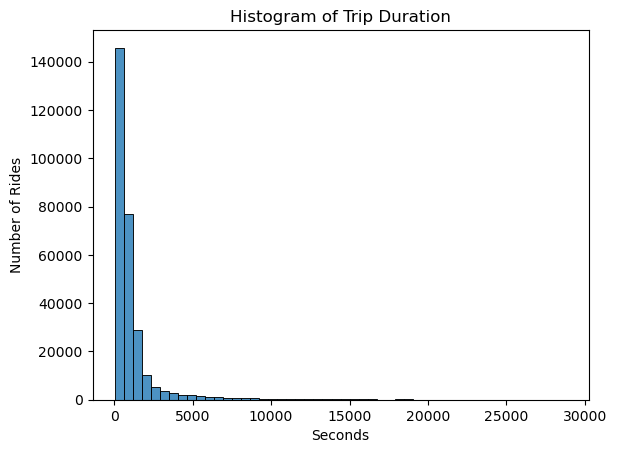

In [163]:
# Put your code here to create the plot
ax = sns.histplot(trip_df, bins=50, alpha=0.8, x="tripduration")
ax.set(xlabel="Seconds", ylabel="Number of Rides", title="Histogram of Trip Duration")

***QUESTION 1.9** Now create a bar plot based on the counts of trips out of each station. Only include the 25 highest volume stations and sort the bars from highest (on the left side) to lowest. HINT: You can do this pretty easily with the built in pandas `plot` command. Of course there's a bit of work to get things sorted and only use the top 25, but pretty straightforward.

Make sure both axes are properly labelled and the plot has an appropriate title.

<Axes: title={'center': 'Histogram of Station Departures'}, xlabel='Count', ylabel='Station'>

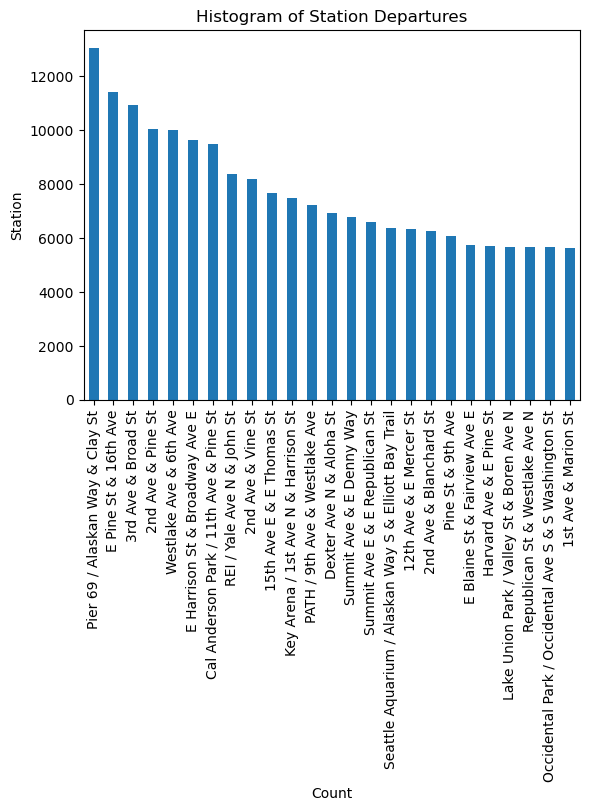

In [164]:
# Put your code here to create the plot
trip_df.value_counts("from_station_name").sort_values(ascending=False)[:25].plot(kind="bar", xlabel="Count", ylabel="Station", title="Histogram of Station Departures")

**QUESTION 1.10** Now create a line plot showing the number of rides per date. A good general hint for creating plots is to first figure out what Series or DataFrame would make the plot easy. Then make that first and base the plot off of it. In this case, you first need to figure out how to create a Series with the number of rides per date. Do **NOT** use the pandas `plot` command. Instead, I've given you skeleton matplotlib code below. Notice that it uses the *object oriented* style of maplotlib usage. You must use this approach. In particular:

- use things like `set_xlabel` to set the x and y axis labels. Similarly, use `set_title` to create a plot title.
- add gridlines


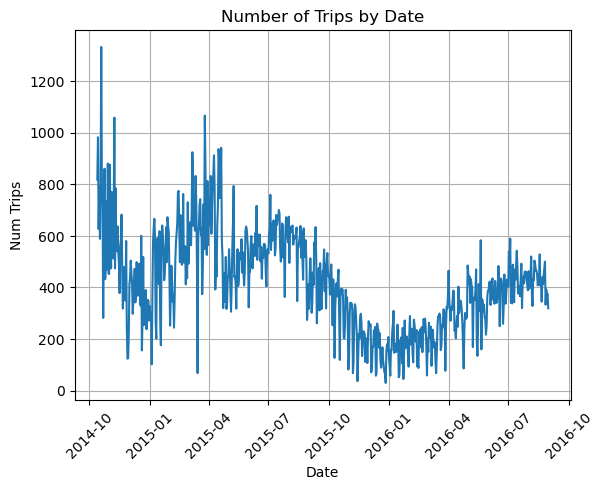

In [184]:
# Use this matplotlib skeleton code for the plot
trip_df["starttime"] = trip_df["starttime"].dt.normalize() 
rpd = trip_df.groupby("starttime").size()

fig, ax = plt.subplots()
ax.plot(rpd)
ax.tick_params(axis="x", rotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('Num Trips')
ax.set_title('Number of Trips by Date')
ax.grid(True)

**ANSWER 1.9**

In [182]:
# Create trips by date dataframe
trips_by_date = trip_df.groupby(trip_df['starttime'].map(lambda x: x.date())).size()
trips_by_date.index = pd.to_datetime(trips_by_date.index)
trips_by_date


starttime
2014-10-13    818
2014-10-14    982
2014-10-15    626
2014-10-16    790
2014-10-17    588
             ... 
2016-08-27    333
2016-08-28    392
2016-08-29    369
2016-08-30    375
2016-08-31    319
Length: 689, dtype: int64

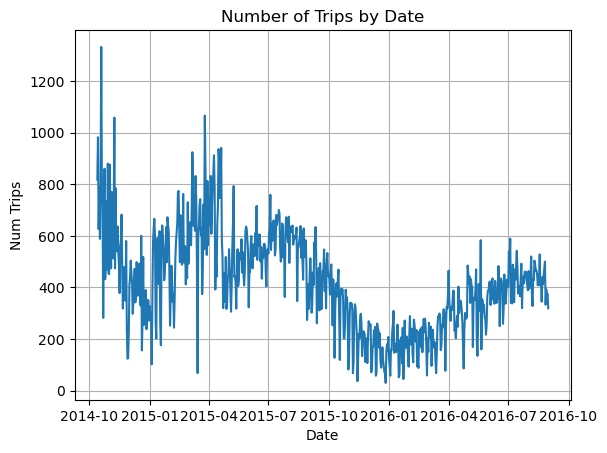

In [183]:
# Use this matplotlib skeleton code for the plot
fig, ax = plt.subplots()
ax.plot(trips_by_date)
ax.set_xlabel('Date')
ax.set_ylabel('Num Trips')
ax.set_title('Number of Trips by Date')
ax.grid(True)

**HACKER EXTRA** Create faceted plots of number of rides by month and year, faceted by `from_station_name`. Seaborn can do faceted plots.

This is tricky. My general strategy is to think about what data structure might make the plot easier to create. In this case, I'd like a count of trips by station by date and then turn that into trips by station by month. What ends up being tricky is doing the resampling of the date when it's part of a `MultiIndex`. The following two resources are helpful:

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#resampling

https://stackoverflow.com/questions/15799162/resampling-within-a-pandas-multiindex

**IMPORTANT NOTE ABOUT DELIVERABLES**
Make sure you run all of your code cells and then save your notebook before submitting.

In [217]:
trip_df["start_month"] = trip_df.starttime.dt.month
trip_df["start_year"] = trip_df.starttime.dt.year
ts_trips = trip_df.groupby(["start_year", "start_month", "from_station_name"]).size().reset_index(name="count")

c:\Users\brand\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\brand\anaconda3\envs\datasci\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

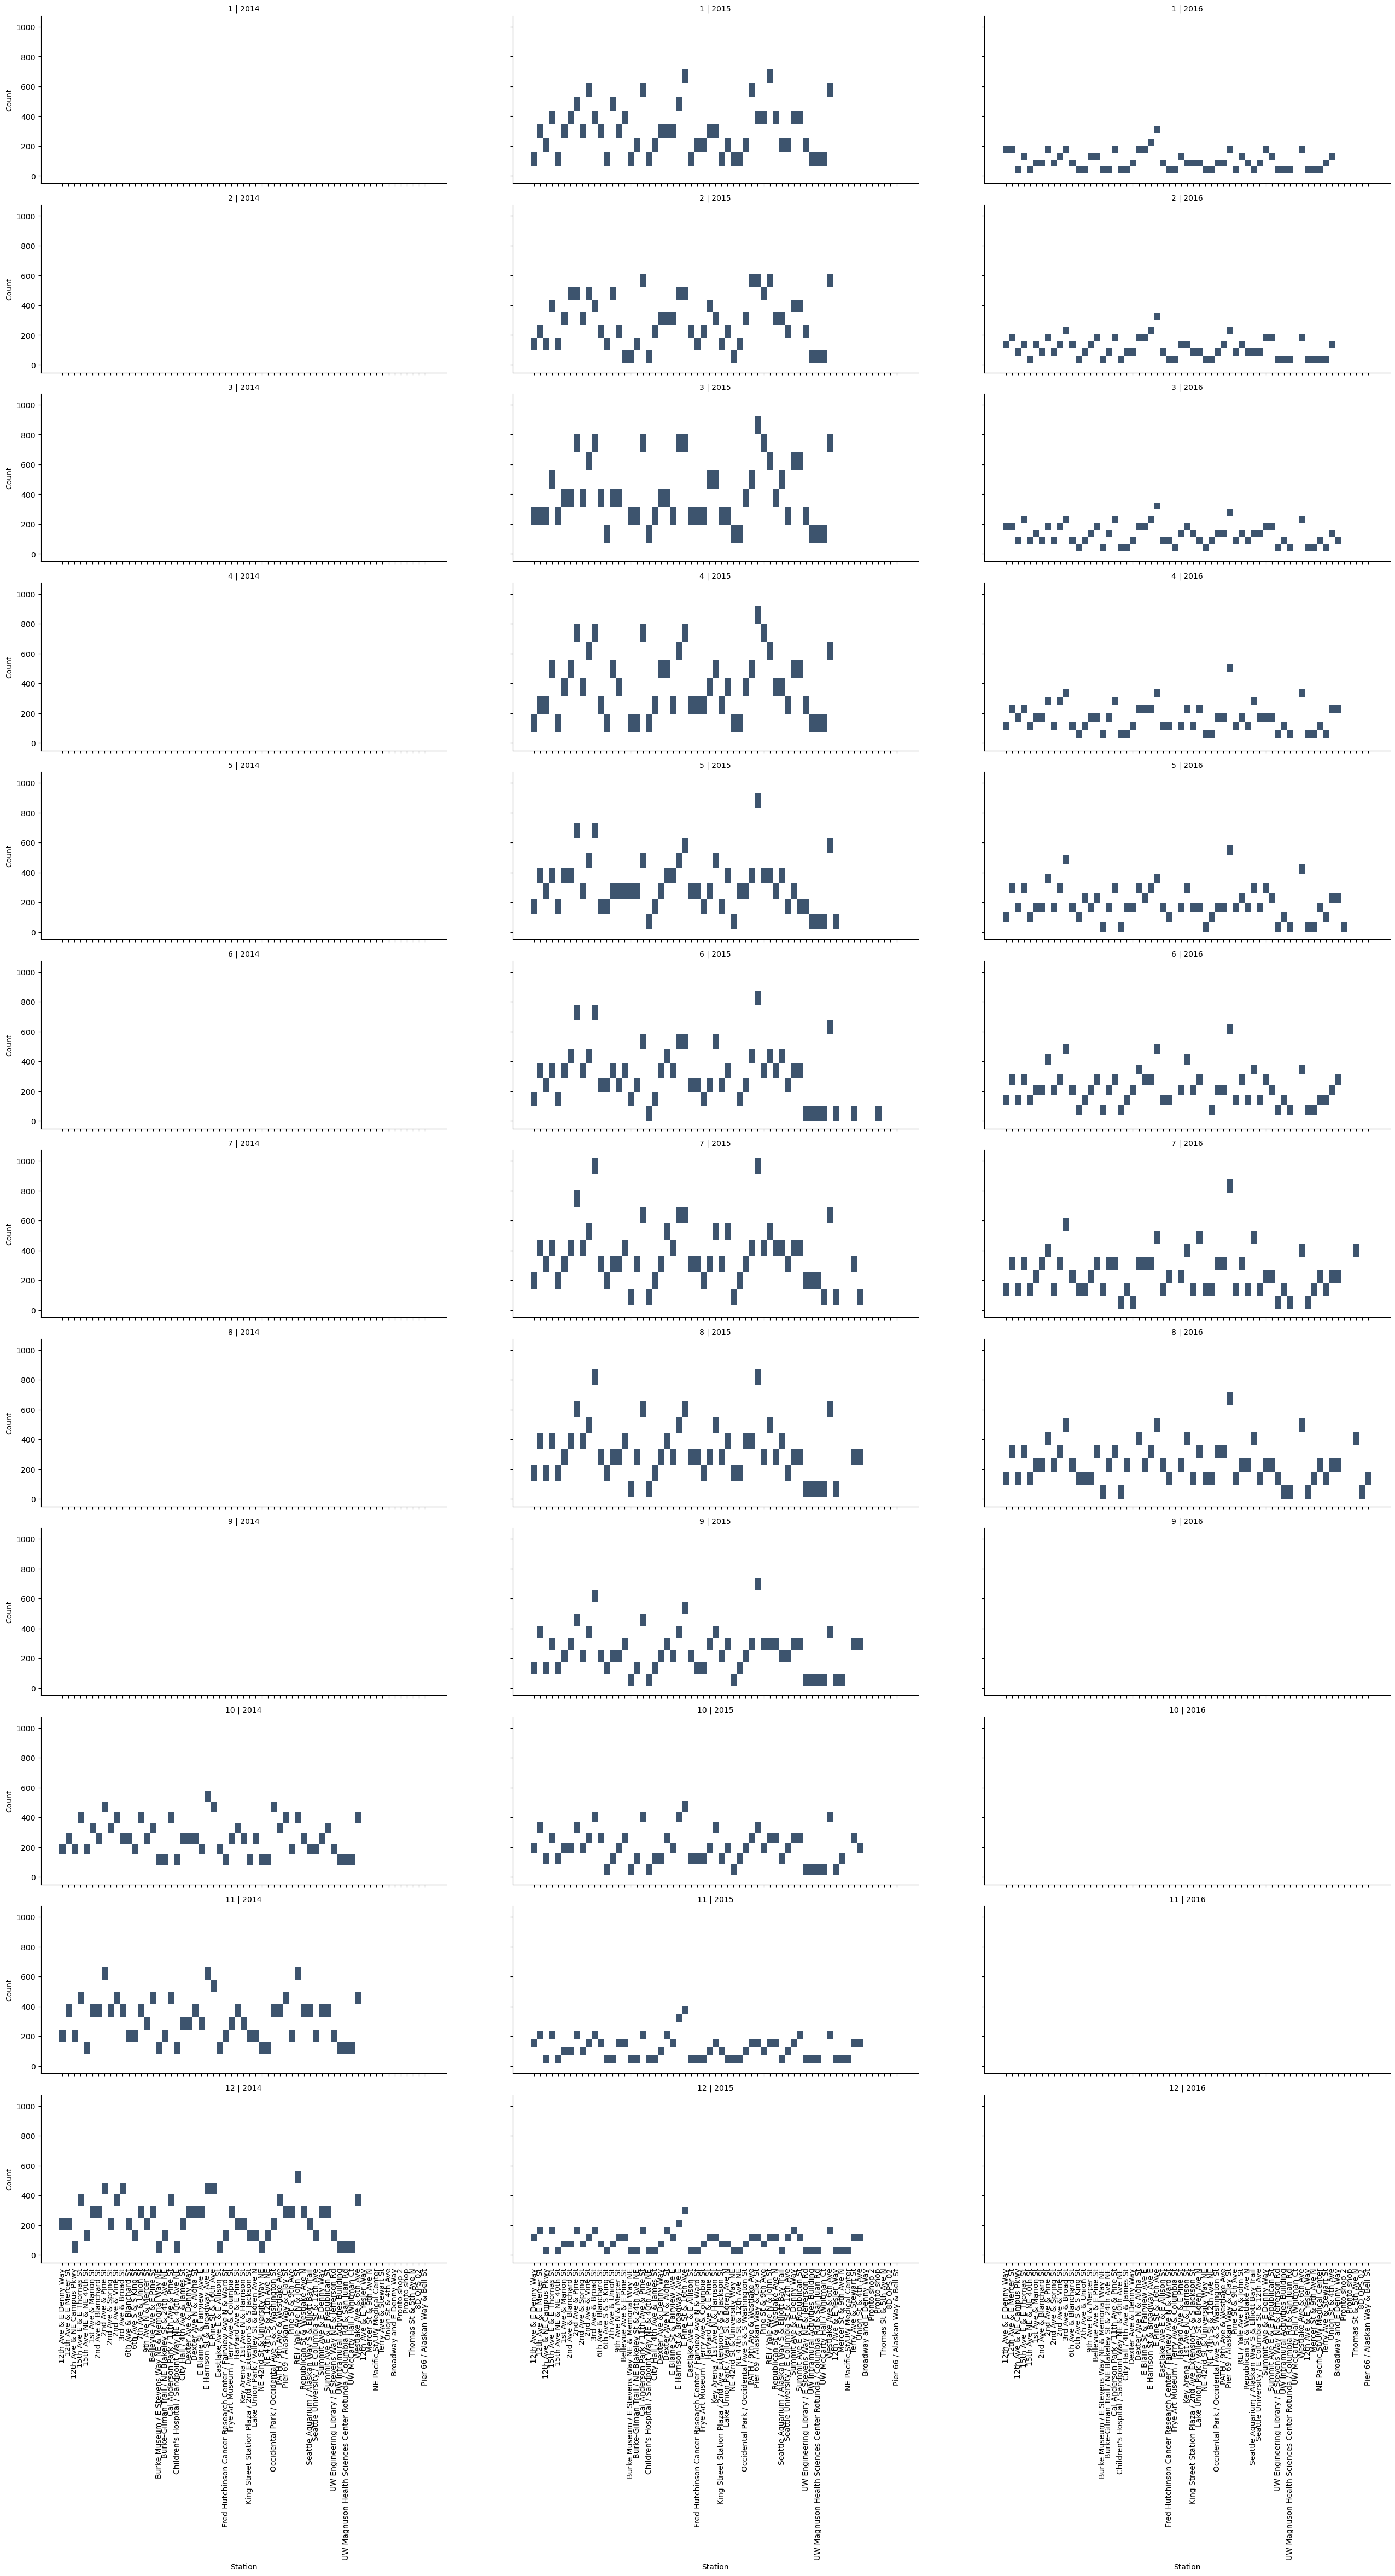

In [228]:
g = sns.FacetGrid(ts_trips, col="start_year", row="start_month", height=3.5, aspect=2.5)
g.map(sns.histplot, "from_station_name", "count")
g.tick_params(axis="x", rotation=90)
g.set_axis_labels("Station", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")